In [2]:
from aide_design.play import*
from aide_design import floc_model as floc

#Below are the items that were imported by the code above so that you know what abbreviations to use in your code.

# Third-party imports
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib

# AIDE imports
#import aide_design
#import aide_design.pipedatabase as pipe
#from aide_design.units import unit_registry as u
#from aide_design import physchem as pc
#import aide_design.expert_inputs as exp
#import aide_design.materials_database as mat
#import aide_design.utility as ut
#import aide_design.k_value_of_reductions_utility as k
#import aide_design.pipeline_utility as pipeline
#import warnings

<div class="alert alert-block alert-danger">

# Before you begin this assignment, you must download the lastest version of aide_design. Follow the instructions on the 4540 Wiki, on the [Updating a Package](https://confluence.cornell.edu/display/cee4540/Updating+a+Package) subpage. 

<div class="alert alert-block alert-info">

## Practice Prelim 2 
Adapted from Fall 2016 Prelim 2

88 points total

# Multiple Choice (4 points each, 20 points total)
Make your answer **bold** by typing `**` before and after the correct answer.

1. Which port has the highest flow in a manifold where pressure recovery exceeds head loss?
    1. First port (closest to the inlet channel)
    1. Middle port
    1. **Last port**
<br>
<br>
1. What should the design goal be for sludge (settled flocs) in sedimentation tanks?
    1. Sludge should be removed with mechanical scrappers 
    1. Sludge should be removed at least every 6 months so it doesn't get too deep
    1. **Sludge should not be allowed to accumulate**
<br>
<br>
1. How are flocs removed from the floc blanket in the newest AguaClara sedimentation tanks?
    1. **Flocs flow over the weir into the floc hopper** 
    1. Sedimentation tanks are taken off line and drained to remove flocs 
    1. Flocs are removed through orifices in the bottom of the jet reverser 
<br>
<br>
1. Which of these pressure changes results in MORE uniform flow from the AguaClara sedimentation tank inlet diffuser pipes?
    1. Pressure ecovery in the manifold pipe
    1. **Exit loss from the diffuser pipe**
<br>
<br>
1. As the water temperature increases the floc blanket solids concentration will
    1. remain the same
    1. **increase**
    1. decrease

# Short Answer (16 points total)
**1.** Describe 4 consequences that would occur if an AguaClara sedimentation tank inlet manifold were rotated 180° so that the diffusers pointed straight up instead of straight down.
    
   1. What would happen to the floc blanket? 
   1. Why would flocs rise through the plate settlers along the centerline of the sedimentation tank? 
   1. Why would flocs begin to rise along with bubbles in a few weeks?
   1. What would happen inside the inlet manifold?
 


### Your Answer to 1. here: 
There would not be a floc blanket. By pointing up instead of down, the jet reverser half pipe would no longer have anything preventing flocs from settling onto it (usually the diffuser jet serves to resuspend flocs along this half pipe), therefore flocs WOULD settle onto it and no floc resuspension would occur, and thus no floc
blanket would be present.


### Your Answer to 2. here:
High velocity of the diffuser jets would continue right through the plate settlers.


### Your Answer to 3. here:
Since flocs/sludge would be accumulating on the bottom for reasons specified in A., after enough time there would be a thick enough layer of sludge below the inlet manifold to form an anaerobic zone. Bacteria would then begin to anaerobically decompose this sludge, leading to methane gas bubbles as a byproduct, which will take flocs along as it bubbles and rises to the top of the sed tank.



### Your Answer to 4. here:
Since there is no longer any outlet at the bottom of the manifold, flocs would begin to settle on the bottom of the manifold. This would be particularly prevalent at the end of the manifold, where there is very little velocity of water to prevent settling. 

# Design Challenges (52 points)

## 1. Head loss in an inlet manifold (15 points)
The inlet manifold for an AguaClara sedimentation tank has a nominal diameter of 8 inches and is SDR 26. The sedimentation tank flow rate is 5.5 liters per second. The sedimentation tank width is 1 m and the upflow velocity is 1 mm/s. The center to center distance between diffusers is 5.5 cm. The diffuser slots are 1/8 inches wide and 4.8 cm long. Assume a temperature of 20°C and a PVC pipe roughness of 0.1 mm.

The function call for head loss in a manifold is:  
`pc.headloss_manifold(FlowRate, Diam, Length, KMinor, Nu, PipeRough, NumOutlets)`


**A.** What is the head loss in the inlet manifold pipe from the first port to the last port? (10 points)  

In [5]:
#Given parameters
flow_manifold = 5.5 * u.L/u.s
W_sed_tank = 1 *u.m
vel_sed_up_BOD = 1 * u.mm/u.s
B_sed_diffuser = 5.5 * u.cm
S_sed_diffuser = 4.8 * u.cm
W_sed_diffuser = 1/8 * u.inch
SDR = 26
ND_manifold = 8 * u.inch
temp_design = 20 * u.degC
PVC_roughness = 0.1 * u.mm


#Calculated parameters
L_sed_tank = flow_manifold/(W_sed_tank*vel_sed_up_BOD)
ID_manifold = pipe.ID_SDR(ND_manifold,SDR)
n_sed_diffusers = int(L_sed_tank/B_sed_diffuser)
nu_design = pc.viscosity_kinematic(temp_design)

#no minor loss through the manifold, no flow expansions
KMinor = 0 


hl_manifold = pc.headloss_manifold(flow_manifold , ID_manifold , L_sed_tank , KMinor, nu_design , PVC_roughness , n_sed_diffusers)
print('The head loss in the inlet manifold pipe from the first port to the last port is ',hl_manifold.to(u.mm))

The head loss in the inlet manifold pipe from the first port to the last port is  0.3323 millimeter


**B.** What is the pressure recovery due to deceleration of the flow? (5 points)

In [19]:
#velocity in the manifold before any water has gone out through diffusers
vel_sed_inlet = flow_manifold/(pc.area_circle(ID_manifold))

#This is converted to pressure by the end of the manifold, since there is no more velocity.
pressure_recovery = (vel_sed_inlet**2)/(2*pc.gravity)

print('The pressure recovery due to deceleration of the flow is ',pressure_recovery.to(u.mm))

The pressure recovery due to deceleration of the flow is  1.495 millimeter


# 2. Settling sludge (6 points)
In general, the settled sludge in the bottom of a sedimentation tank has a concentration of about 300 g/L of clay. AguaClara sedimentation tanks have a sloped bottom to allow for the growth of the floc blanket and to prevent sludge build-up. Flat bottom sedimentation tanks allow sludge to build-up to occur.

* How long would it take for the sludge to build up to the angle of repose (of about 45 degrees) in a 1 m wide ** * flat-bottomed * ** sedimentation tank? The angle of repose is the angle of a surface at which flocs begin to slide instead of settle. 

You may assume the inlet system is the AguaClara diffuser and jet reverser, that the upflow velocity is 1 mm/s, influent turbidity is constant at 25 NTU, and that no flocs leave the sed tank until the sludge builds up entirely. Neglect the small impact of the diameter of the jet reverser in your estimate. You may find it helpful to create a diagram of this problem. What does the sed tank look like before and after the sludge has settled?

![](Sludge_created_tolva.png)

In [23]:
NTU = 1.7 * u.gram/u.m**3  #of clay

#Given Parameters
vel_sed_up_BOD = 1 *u.mm/u.s
sludge_conc = 300 * u.gram/u.L
W_sed_tank = 1 * u.m
turb_influent = 25 * NTU

#Calculated parameters
H_sludge = W_sed_tank/4 #This is an 'equivalent height' of sludge if the sludge geometery were 
                        #a rectangle along the bottom of the sed tank instead of two triangles. 
                        #Draw a picture to understand why this is. If the jet reverser is
                        #(basically) at the center of the width and the angle of repose is 45°,  
                        #you will have two mirror-image 45-45-90 triangles of sludge

vel_settle = (vel_sed_up_BOD*turb_influent)/sludge_conc #mass conservation, since all the particles  
                                                      #that come in settle. This finds a 'settling velocity',
                                                      #or a rate of settling.
    
time_sludge_settling = H_sludge/vel_settle #This is the time it will take for the sludge to settle to this
                                           #equivalent height


print('It will take ',time_sludge_settling.to(u.day),' for the sludge to settle into the angle of repose.')

It will take  20.42 day  for the sludge to settle into the angle of repose.


# 3. Floc blanket density (6 points)
The density of the floc blanket increases with the floc blanket clay concentration. A former graduate student determined the following equation based on laboratory measurements using real flocs that contained both clay and coagulant:

$$\rho_{FB} = 0.687C_{FlocSolids} +  \rho_{Water}$$

where $ \rho_{FB} $ is the density of the floc blanket, $C_{FlocSolids}$ is the concentration of clay in the floc blanket, and $\rho_{Water}$ is the density of water (assume 20°C).

The coeffiecient for $C_{FlocSolids}$ given above is 0.687; however, this value is not fully correct due to some experiemental error. We can analytically determine the coefficent for $C_{FlocSolids}$ to compare it to the experimentally derived value. 

* Derive an equation for the density of a floc blanket, given the concentration of clay in the floc blanket and calculate the value of the coefficient from first principles. Neglect the effect of the coagulant on the solids concentration. 





### Solution: 
The density of the floc blanket is a weighted average of clay density and water density, with the weights being the relative amount of clay. $ \frac{C_{FlocSolids}}{\rho_{Clay}} $ is a number between 0 and 1 which represents how 'saturated' the floc blanket is with clay.
$$  \rho_{FB} = \Big(1 - \frac{C_{FlocSolids}}{\rho_{Clay}}\Big)\rho_{Water} + \frac{C_{FlocSolids}}{\rho_{Clay}}\rho_{Clay}  $$

By rearranging, we can get a coefficient for $ C_{FlocSolids} $
$$ \rho_{FB} = C_{FlocSolids}\Big(\frac{\rho_{Clay} - \rho_{Water}}{\rho_{Clay}}\Big) + \rho_{Water} $$


In [5]:
rho_clay = 2650 * u.kg/u.m**3

water_density = pc.density_water(20*u.degC)
clay_coefficient = (rho_clay - water_density)/rho_clay

print(clay_coefficient)

0.6233 dimensionless


# 4. Terminal velocity graphing (10 points)
Plot the diameter of the smallest floc that can be reliably captured by a plate settler as a function of temperature. 
* Use a capture velocity of 0.12 mm/s and a temperature range from 0°C to 35°C.  
* The shape factor for the terminal velocity equation is given as `phi_shape_factor`. 
* Format the graph with axis labels *and a title*. 
* Neglect the effect of the coagulant on density and model this as a fractal made of clay.

In [31]:
#Given parameters
rho_clay = 2650 * u.kg/u.m**3
phi_shape_factor = floc.PHI_FLOC
diam_clay_primary = 7 * u.um
D_FRACTAL = floc.DIAM_FRACTAL

### Solution
This equation found on Sedimentation powerpoint slide 7
$$  
   V_{t} = \frac{ gd_{o}^2 }{ 18 \Phi \nu_{H_{2}O} }   
            \frac{ \rho_{Floc_{0}} - \rho_{H_{2}O} }{ \rho_{H_{2}O} } 
            \Big(\frac{d}{d_{0}}\Big)^{D_{Fractal}-1} 
$$

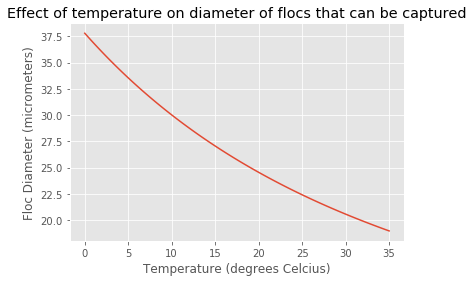

In [25]:
vel_capture = 0.12 * u.mm/u.s
temp_array = np.linspace(0,35,100)*u.degC
nu_water_array = pc.viscosity_kinematic(temp_array)
rho_water_array = pc.density_water(temp_array)


diam_array =(diam_clay_primary*(
            vel_capture * (  (18*phi_shape_factor*nu_water_array)/(pc.gravity*diam_clay_primary**2)  ) 
            * (  (rho_water_array)/(rho_clay - rho_water_array)  )
            )**(1/(D_FRACTAL-1)))

plt.plot(temp_array, diam_array.to(u.um), '-')
plt.xlabel('Temperature (degrees Celcius)')
plt.ylabel('Floc Diameter (micrometers)')
plt.title('Effect of temperature on diameter of flocs that can be captured')
plt.show()

# 5. Plate Settlers (10 points) 
Brentwood Industries sells tube settlers with the following characteristics: 

Tube Settler | Vertical Height | Tube Length | Typical Deign Application Rate
---: | :---: | :---: | :---: |
IFR-6041 | 41 inch | 47.34 inch | 8.56 m/hr

* What is the capture velocity for these tube settlers when operated at their typical application rate? 

Neglect the effect of the thickness of the tube settler walls. Assume that the tubes have an average spacing normal to the direction of flow of 5 cm (treat them like plate settlers).

In [29]:
#Given parameters
S_tube = 5 * u.cm
L_tube = 47.34 *u.inch
H_tube = 41 * u.inch
vel_brent_up = 8.56 * u.m/u.hr

#Calculated Parameters
angle_tube = np.arcsin(H_tube/L_tube) # comes out in radians
vel_capture = (vel_brent_up*S_tube)  /  (L_tube*(np.sin(angle_tube)*np.cos(angle_tube))  +  S_tube)
print('The capture velocity of these plate settlers from Brentwood industries is',vel_capture.to(u.mm/u.s))

The capture velocity of these plate settlers from Brentwood industries is 0.2084 millimeter / second


# 6. Dimensional Analysis (5 points)  
The plan view area of floc blankets in an AguaClara plant is $ 50 m^2$. **With the knowledge you have regarding the velocity of water in an AguaClara sedimentation tank,** estimate the population the plant was designed to serve assuming that the per capita water consumption is 3 mL/s.


In [8]:
#Given parameters
area_plan = 50 * u.m**2
flow_per_person = 3 * u.mL/u.s
vel_sed_up_BOD = 1*u.mm/u.s #this one's the kicker, bet you haven't seen this number before

people = area_plan*vel_sed_up_BOD/flow_per_person
print('This plant can serve ',np.floor((people.to(u.dimensionless)).magnitude), 'people.')

This plant can serve  16666.0 people.
